# Tokenizing and Clustering

In [1]:
import pprint
from operator import itemgetter
# Useful functions

def hashEl(name, url):
    """
    MD5 hash of Name and URL
    Hash each individually, use max/min functions to ensure hash 2 happens in same order irrespective of which get's input first.
    """
    h1 = md5(name.encode()).hexdigest()
    h2 = md5(url.encode()).hexdigest()
    h3 = max(h1, h2) + min(h1, h2)
    h4 = md5(h3.encode()).hexdigest()
    return h3

def bottleDetailsFromURL(df, URL, alg):
    """
    Function for pure laziness... Because apparently I can't remember an md5 hash off the top of my head...
    """
    bottle_id = n_df[n_df["URL"] == URL]["ID"].values[0]
    name = n_df[n_df["URL"] == URL]["Name"].values[0]
    cluster = df[df.ID == bottle_id][alg].values[0]
    out = {
        "id":bottle_id,
        "name":name,
        "cluster":cluster
    }
    return out

def bottleDetailsFromURLS(df,URLS, alg,verbose=True):
    clusters = {}
    for URL in URLS:
        details = bottleDetailsFromURL(df, URL[0], alg)
        name = details['name']
        cluster = details['cluster']
        if verbose:
            print(f"Whisky: {name}\n---- {alg} Cluster: {cluster}")
        if cluster in clusters.keys():
            clusters[cluster].append(name)
        else:
            clusters[cluster] = [name]
    return clusters

def getClusterNames(cluster, alg):
    return list(vectorised[vectorised[alg] == cluster].Name)



def topN(lst, depth):
    lst.sort(key=itemgetter(1), reverse=True)
    return lst[:depth]
    
    
    
from operator import itemgetter

def topN(lst, depth):
    lst.sort(key=itemgetter(1), reverse=True)
    return lst[:depth]
    
def getClusterDescriptions(alg, df, depth):
    features = df.columns
    centers = alg.cluster_centers_
    descs = {}
    for idx , center in enumerate(centers):
        fcenter = list(zip(features, center))
        descs[idx] = topN(fcenter, depth)
    return descs
    
    
def methodOutputSummary(vectorised, vec_features, urls, model, model_name):
    clusters = bottleDetailsFromURLS(vectorised, urls, model_name, verbose=False)
    descs = getClusterDescriptions(kmeans, vec_features, 3)
    print(f"Summary for model {model_name}")
    for key in descs.keys():
        if key in clusters.keys():
            description = ", ".join([d[0] for d in descs[key]])
            members = ", ".join([d for d in clusters[key]])
            print(f"Cluster: {key}")
            print(f"Cluster Description:")
            print(f"---- {description}")
            print(f"Cluster Members:")
            print(f"---- {members}")
            print("")

In [2]:
interesting_urls = [
    ("https://www.masterofmalt.com/whiskies/dalmore-15-year-old-whisky/", "A"),
    ("https://www.masterofmalt.com/whiskies/glendronach/the-glendronach-12-year-old-whisky/", "A"),
    ("https://www.masterofmalt.com/whiskies/royal-lochnagar-12-year-old-whisky/", "A"),
    ("https://www.masterofmalt.com/whiskies/edradour-10-year-old-whisky/", "B"),
    ("https://www.masterofmalt.com/whiskies/aberlour/aberlour-abunadh-whisky/", "B"),
    ("https://www.masterofmalt.com/whiskies/blair-athol-12-year-old-whisky/", "B"),
    ("https://www.masterofmalt.com/whiskies/balvenie/balvenie-doublewood-12-year-old-whisky/", "C"),
    ("https://www.masterofmalt.com/whiskies/glen-elgin/glen-elgin-14-year-old-derestricted-whisky/", "C"),
    ("https://www.masterofmalt.com/whiskies/auchentoshan-12-year-old-whisky/", "D"),
    ("https://www.masterofmalt.com/whiskies/bunnahabhain/bunnahabhain-stiuireadair-whisky/", "E"),
    ("https://www.masterofmalt.com/whiskies/glenallachie/glenallachie-12-year-old-whisky/", "E"),
    ("https://www.masterofmalt.com/whiskies/deanston-12-year-old-whisky/", "F"),
    ("https://www.masterofmalt.com/whiskies/glenrothes/glenrothes-12-year-old-soleo-collection-whisky/", "F"),
    ("https://www.masterofmalt.com/whiskies/arran/arran-10-year-old-whisky/", "G"),
    ("https://www.masterofmalt.com/whiskies/glenfiddich-12-year-old-whisky/", "G"),
    ("https://www.masterofmalt.com/whiskies/glenmorangie/glenmorangie-10-year-old-the-original-whisky/", "H"),
    ("https://www.masterofmalt.com/whiskies/pulteney/old-pulteney-12-year-old-whisky/", "H"),
    ("https://www.masterofmalt.com/whiskies/bowmore/bowmore-15-year-old-whisky/", "I"),
    ("https://www.masterofmalt.com/whiskies/highland-park/highland-park-12-year-old-viking-honour-whisky/", "I"),
    ("https://www.masterofmalt.com/whiskies/bruichladdich/bruichladdich-scottish-barley-the-classic-laddie-whisky/", "I"),
    ("https://www.masterofmalt.com/whiskies/laphroaig-10-year-old-whisky/", "J"),
    ("https://www.masterofmalt.com/whiskies/ardbeg/ardbeg-10-year-old-whisky/", "J"),
    ("https://www.masterofmalt.com/whiskies/talisker/talisker-10-year-old-whisky/", "J")
]

## Applying preprocessing from data

In [3]:
import pandas as pd
import numpy as np


In [4]:
df = pd.read_csv("scotch-no-dupes.csv")

In [5]:
df.head()

,ID,Type,Name,Description,Nose,Palate,Finish,Price,Size,Abv,URL
0,495334d7384f4c9a933a156cb57639770cd9c8bca00ac7...,blended malt scotch,Monkey Shoulder Blended Malt Scotch Whisky,Monkey Shoulder Scotch is a superb blended mal...,"An elegant, stylish nose of marmalade, Crema C...","Very malty, creamy delivery with a suggestion ...","Medium length, spicy oak and a hint of pepperm...",25.94,70.0,40.0,https://www.masterofmalt.com/whiskies/monkey-s...
1,e193fa8dee0bb9422054efd5dfb7f2c2628815243b584b...,blended malt scotch,Johnnie Walker Green Label 15 Year Old,"One of those harder-to-find whiskies, Johnnie ...",NaN,NaN,NaN,38.95,70.0,43.0,https://www.masterofmalt.com/whiskies/johnnie-...
2,d3ba34da7b98276f2da2ab313ff9e6cdc5d476d253a05e...,blended malt scotch,The Naked Grouse,An interesting addition to the Famous Grouse r...,"Smooth and oily with notes of cherry compote, ...","Sherried and thick with notes of sultanas, sti...","Medium, with notes of cocoa, oak and just a so...",26.49,70.0,40.0,https://www.masterofmalt.com/whiskies/naked-gr...
3,b74f75c04d65218b3b094130583f53b58b58d331f47d44...,blended malt scotch,Scallywag,Big Peat's gone and got himself a trusty sidek...,Sweetness jumps up like an excited puppy. Icin...,"The sweetness surprisingly retreats, revealing...",A pinch of oak spice joins the vanilla and she...,38.75,70.0,46.0,https://www.masterofmalt.com/whiskies/douglas-...
4,a6f33f754e0dbb178b5fef3ff0d031f470918b9477703c...,blended malt scotch,Monkey Shoulder Smokey Monkey,A peaty variant of the excellent Monkey Should...,"Honeydew melon, flamed orange peel, a touch of...","Vanilla sits at the core, its earthy notes bol...",Toffee Crisp bars and the last wafts of drying...,27.44,70.0,40.0,https://www.masterofmalt.com/whiskies/monkey-s...


We load the WhiskyLemmatizer made in previous steps, and use this to process our graph, aiming to make a vectorised dataset

In [6]:
from whiskynlp.GraphKeywordExtraction import GraphKE
from whiskynlp.Vectorizer import ListFeatureVectorizer

KE = GraphKE()

# nose graph
nose_kw = KE.keywordExtract(df, "Nose")
nose_graph = KE.G
# palate graph
palate_kw = KE.keywordExtract(df, "Palate")
palate_graph = KE.G

# finish graph
finish_kw = KE.keywordExtract(df, "Finish")
finish_graph = KE.G


Building Corpus
Building Graph
Candidate Keywords Selected
Edges Created
Ranking Nodes
Building Corpus
Building Graph
Candidate Keywords Selected
Edges Created
Ranking Nodes
Building Corpus
Building Graph
Candidate Keywords Selected
Edges Created
Ranking Nodes


In [7]:
def displayNKwords(kwords, n):
    kwords =" ".join([kword[0] for kword in kwords][:n])
    print(kwords)

In [8]:
displayNKwords(palate_kw,100)

fruit sweet spice oak vanilla chocolate smoke malt honey pepper apple dry cream orange rich nut butter cinnamon peat toffee peel barley sugar black ginger fresh oil toast develop salt caramel dark little citrus lemon sherry red spicy thick soft white wood warm raisin balance pear berry brown apricot char biscuit almond juicy herb slight milk zest follow coffee cake syrup bit tropical clove earthy sea jam plum floral green walnut grape light big first marmalade pine orchard custard still grass banana stew peach sultana cereal quite ice cherry come candy lot lead bread though cocoa heat core well anise


## Naive Features
Proof of concept - taking 200 top of all, amalgamating into a set, and ignoring any difference between nose, palate and finish.

In [9]:
def amalgamateLists(lsts):
    amal = []
    for lst in lsts:
        # Unzip and convert to list
        lst = list(list(zip(*lst))[0])
        amal = amal + lst
    set_amal = set(amal)
    return list(set_amal)

In [112]:
all_kws = amalgamateLists([
    nose_kw[:150],
    palate_kw[:150],
    finish_kw[:150]
    
])
len(all_kws)

196

In [113]:
df["All"] = df.Nose + " " + df.Palate + " " + df.Finish  + " " + df.Description

In [114]:
lfv = ListFeatureVectorizer(all_kws)
n_df, all_lst = lfv.prepropRemoveNas(df, "All")

In [115]:
vectorised = lfv.fit(all_lst, True)

In [116]:
# Adding ID and name to vectorised list
vectorised["ID"] = n_df.ID
vectorised["Name"] = n_df.Name


In [117]:
# Saving to csv - can avoid in future
vectorised.to_csv("vectorised_all.csv", index=False)

In [118]:
#vectorised_features = vectorised.drop(["ID","Name"], axis=1)

In [119]:
vectorised = pd.read_csv("vectorised_all.csv")
vectorised_features = vectorised.drop(["ID","Name"], axis=1)
vectorised.head()

,dark,support,thick,apricot,round,bean,nut,oak,ice,subtle,...,big,return,still,tea,meat,treacle,tobacco,allspice,ID,Name
0,0.0,0.0,0.000000,0.133631,0.0,0.0,0.133631,0.133631,0.133631,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,495334d7384f4c9a933a156cb57639770cd9c8bca00ac7...,Monkey Shoulder Blended Malt Scotch Whisky
1,0.0,0.0,0.196116,0.000000,0.0,0.0,0.000000,0.196116,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,d3ba34da7b98276f2da2ab313ff9e6cdc5d476d253a05e...,The Naked Grouse
2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.162221,0.162221,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b74f75c04d65218b3b094130583f53b58b58d331f47d44...,Scallywag
3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,a6f33f754e0dbb178b5fef3ff0d031f470918b9477703c...,Monkey Shoulder Smokey Monkey
4,0.0,0.0,0.000000,0.182574,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,963812f735e400dab236b19de57b52bc899bc79f0f713d...,Timorous Beastie


### kmeans

In [120]:
from sklearn.cluster import KMeans
kmeans =  KMeans(
    n_clusters=6,
    n_init=100,
    max_iter=1000
)

kmeans.fit(vectorised_features)

KMeans(max_iter=1000, n_clusters=6, n_init=100)

In [121]:
vectorised["kmeans"] = kmeans.labels_
vectorised.head()

,dark,support,thick,apricot,round,bean,nut,oak,ice,subtle,...,return,still,tea,meat,treacle,tobacco,allspice,ID,Name,kmeans
0,0.0,0.0,0.000000,0.133631,0.0,0.0,0.133631,0.133631,0.133631,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,495334d7384f4c9a933a156cb57639770cd9c8bca00ac7...,Monkey Shoulder Blended Malt Scotch Whisky,3
1,0.0,0.0,0.196116,0.000000,0.0,0.0,0.000000,0.196116,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,d3ba34da7b98276f2da2ab313ff9e6cdc5d476d253a05e...,The Naked Grouse,3
2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.162221,0.162221,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b74f75c04d65218b3b094130583f53b58b58d331f47d44...,Scallywag,4
3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,a6f33f754e0dbb178b5fef3ff0d031f470918b9477703c...,Monkey Shoulder Smokey Monkey,1
4,0.0,0.0,0.000000,0.182574,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,963812f735e400dab236b19de57b52bc899bc79f0f713d...,Timorous Beastie,3


In [122]:
methodOutputSummary(vectorised, vectorised_features, interesting_urls, kmeans, "kmeans")

Summary for model kmeans
Cluster: 0
Cluster Description:
---- malt, vanilla, sweet
Cluster Members:
---- Dalmore 15 Year Old, Deanston 12 Year Old, Bowmore 15 Year Old, Highland Park 12 Year Old - Viking Honour, Bruichladdich Scottish Barley - The Classic Laddie

Cluster: 1
Cluster Description:
---- smoke, peat, malt
Cluster Members:
---- Laphroaig 10 Year Old, Ardbeg 10 Year Old, Talisker 10 Year Old

Cluster: 2
Cluster Description:
---- oak, malt, vanilla
Cluster Members:
---- Royal Lochnagar 12 Year Old, Balvenie DoubleWood 12 Year Old, Auchentoshan 12 Year Old, GlenAllachie 12 Year Old, Old Pulteney 12 Year Old

Cluster: 3
Cluster Description:
---- malt, fruit, oak
Cluster Members:
---- Bunnahabhain Stiùireadair, Arran 10 Year Old, Glenmorangie 10 Year Old - The Original

Cluster: 4
Cluster Description:
---- sherry, malt, fruit
Cluster Members:
---- The GlenDronach 12 Year Old, Edradour 10 Year Old, Aberlour A'Bunadh Batch 68, Blair Athol 12 Year Old - Flora and Fauna, The Glenroth

### Elbow method to optimise kmeans

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')

Text(0.5, 1.0, 'Inertia aganst K with KNN clustering')

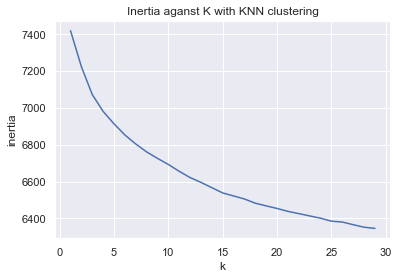

In [33]:
n_clusters = np.arange(1, 30)
inertia = []
for n in n_clusters:
    kmeans =  KMeans(
    n_clusters=n,
    n_init=20,
    max_iter=1000
    )
    kmeans.fit(vectorised_features)
    inertia.append(kmeans.inertia_)
    
plt.plot(n_clusters, inertia)
ax = plt.gca()
ax.set_xlabel("k")
ax.set_ylabel("inertia")
plt.title("Inertia aganst K with KNN clustering")

## Peddling Naive Bayes

In [137]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [138]:
X_train, X_test, y_train, y_test = train_test_split(vectorised_features, vectorised["kmeans"])
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [139]:
nb.score(X_test, y_test)

0.5460926532522228

In [140]:
nb.predict_proba(vectorised_features[vectorised["Name"] == "Blair Athol 12 Year Old - Flora and Fauna"])

array([[3.30020857e-41, 3.30224311e-07, 5.05452624e-21, 1.30477537e-18,
        9.99999670e-01, 1.09834704e-16]])

In [144]:
names = ['Dalmore 15 Year Old','Edradour 10 Year Old',"Aberlour A'Bunadh Batch 68",'The Glenrothes 12 Year Old - Soleo Collection','The GlenDronach 12 Year Old','Royal Lochnagar 12 Year Old',
 'Balvenie DoubleWood 12 Year Old','Glen Elgin 14 Year Old - Derestricted','Auchentoshan 12 Year Old','Bunnahabhain Stiùireadair','Deanston 12 Year Old','Old Pulteney 12 Year Old','Highland Park 12 Year Old - Viking Honour',
 'Bruichladdich Scottish Barley - The Classic Laddie','Talisker 10 Year Old','Blair Athol 12 Year Old - Flora and Fauna','Laphroaig 10 Year Old','Ardbeg 10 Year Old','GlenAllachie 12 Year Old','Arran 10 Year Old', 'Glenmorangie 10 Year Old - The Original','Glenfiddich 12 Year Old', 'Bowmore 15 Year Old']
def predictProba(model):
    for name in names:
        probs = model.predict_proba(vectorised_features[vectorised["Name"] == name])
        print(f"{name}:")
        print(f"----{probs}")
        
predictProba(nb)

Dalmore 15 Year Old:
----[[7.64425630e-12 8.35324948e-38 2.12640006e-13 2.77171282e-16
  9.99960394e-01 3.96059076e-05]]
Edradour 10 Year Old:
----[[1.21076059e-72 1.61761149e-15 6.16794840e-31 2.22356493e-48
  1.00000000e+00 6.00733793e-11]]
Aberlour A'Bunadh Batch 68:
----[[8.51003555e-54 1.50446615e-23 8.38381651e-15 8.30799859e-34
  1.00000000e+00 1.23421562e-10]]
The Glenrothes 12 Year Old - Soleo Collection:
----[[3.20128827e-48 2.46221477e-18 7.94762362e-17 6.41711113e-17
  9.90572541e-01 9.42745920e-03]]
The GlenDronach 12 Year Old:
----[[6.52607412e-22 5.51201975e-20 1.14059668e-14 1.44130427e-08
  9.99999986e-01 5.67246732e-11]]
Royal Lochnagar 12 Year Old:
----[[1.17042848e-14 2.03173844e-08 3.78330117e-11 4.67066392e-13
  2.23750298e-25 9.99999980e-01]]
Balvenie DoubleWood 12 Year Old:
----[[2.49676296e-43 1.18577507e-03 6.80092100e-01 2.01358284e-07
  2.83951826e-01 3.47700972e-02]]
Glen Elgin 14 Year Old - Derestricted:
----[[9.99999992e-01 1.01620596e-52 3.29559130e-12 8

## Manual Recommendation 

In [158]:
# Query : I want something similar to Laphroig 10 and Ardbeg 10

In [266]:
Laphroaig = 'Laphroaig 10 Year Old'
Ardbeg = 'Ardbeg 10 Year Old'
Edradour = 'Edradour 10 Year Old'
likes = [Laphroaig,Ardbeg]
likes = ['Laphroaig 10 Year Old','Glen Elgin 14 Year Old - Derestricted']
dislikes = []

In [267]:
vector = np.zeros(len(np.array(vectorised_features[vectorised["Name"] == likes[0]])))
for like in likes:
    like_vec = np.array(vectorised_features[vectorised["Name"] == like ])
    vector = vector + like_vec
for dislike in dislikes:
    dislike_vec = np.array(vectorised_features[vectorised["Name"] == dislike ])
    vector = vector - dislike_vec
    
vector = np.transpose(vector / np.linalg.norm(vector))

In [268]:
cossim = np.matmul(vectorised_features, vector)
n_df["cossim"] = cossim
sugg = n_df.sort_values("cossim",ascending=False)

In [269]:
sugg = sugg[[name not in likes for name in sugg["Name"].values]]
sugg = sugg[np.isnan(sugg["Price"]) == False]

In [270]:
list(sugg["Name"][:10])

['Drinks by the Dram Single Cracker - Lagavulin 16 Year Old',
 'Ledaig 10 Year Old',
 'Tormore 21 Year Old (That Boutique-y Whisky Company)',
 'Laphroaig Triple Wood',
 'Lagavulin 16 Year Old 1l',
 'Springbank 21 Year Old 1996 - Single Cask (Master of Malt)',
 'BenRiach 9 Year Old 2008 (cask 2047)',
 'SPEY 12 Year Old Peated',
 'Loch Lomond The Open Special Edition ',
 'Highland Park Valkyrie']

## Prototypical Cosine Similarity Recommender Function

In [271]:
def getRecommendations(likes, dislikes):
    vector = np.zeros(len(np.array(vectorised_features[vectorised["Name"] == likes[0]])))
    for like in likes:
        like_vec = np.array(vectorised_features[vectorised["Name"] == like ])
        vector = vector + like_vec
    for dislike in dislikes:
        dislike_vec = np.array(vectorised_features[vectorised["Name"] == dislike ])
        vector = vector - dislike_vec

    vector = np.transpose(vector / np.linalg.norm(vector))
    
    sim = np.matmul(vectorised_features, vector)
    n_df["cossim"] = sim
    sugg = n_df.sort_values("cossim",ascending=False)
    
    sugg = sugg[[name not in likes for name in sugg["Name"].values]]
    sugg = sugg[np.isnan(sugg["Price"]) == False]
    
    return sugg["Name"][:10]

In [298]:
names = ['Dalmore 15 Year Old','Edradour 10 Year Old',"Aberlour A'Bunadh Batch 68",'The Glenrothes 12 Year Old - Soleo Collection','The GlenDronach 12 Year Old','Royal Lochnagar 12 Year Old',
 'Balvenie DoubleWood 12 Year Old','Glen Elgin 14 Year Old - Derestricted','Auchentoshan 12 Year Old','Bunnahabhain Stiùireadair','Deanston 12 Year Old','Old Pulteney 12 Year Old','Highland Park 12 Year Old - Viking Honour',
 'Bruichladdich Scottish Barley - The Classic Laddie','Talisker 10 Year Old','Blair Athol 12 Year Old - Flora and Fauna','Laphroaig 10 Year Old','Ardbeg 10 Year Old','GlenAllachie 12 Year Old','Arran 10 Year Old', 'Glenmorangie 10 Year Old - The Original','Glenfiddich 12 Year Old', 'Bowmore 15 Year Old']

likes = ['Laphroaig 10 Year Old',"Aberlour A'Bunadh Batch 68","Edradour 10 Year Old 2008 (cask 371) - Un-Chillfiltered Collection (Signatory)"]
dislikes = ['Ardbeg 10 Year Old']
getRecommendations(likes,dislikes)

3526                            The Corriemhor 8 Year Old
894                              Arran Bodega Sherry Cask
2415    Pulteney 19 Year Old 1999 - Connoisseurs Choic...
3200    Macduff 10 Year Old 2007 (cask 900594) - Bench...
1291    Teaninich 9 Year Old 2012 (cask 702608) - Lady...
1595    Royal Brackla 7 Year Old 2013 (cask 14) - The ...
2900      Hazelburn 13 Year Old 2007 Oloroso Cask Matured
1957    Deanston 12 Year Old 2007 (cask 900142) - Cask...
2142    Tobermory 19 Year Old 1996 (cask 126) - Rest &...
1447           Ardmore 10 Year Old 2009 - Single & Single
Name: Name, dtype: object

In [296]:
likes = ['Laphroaig 10 Year Old',"Aberlour A'Bunadh Batch 68","Edradour 10 Year Old 2008 (cask 371) - Un-Chillfiltered Collection (Signatory)"]
dislikes = ['Old Pulteney 12 Year Old']
getRecommendations(likes,dislikes)

1595    Royal Brackla 7 Year Old 2013 (cask 14) - The ...
3526                            The Corriemhor 8 Year Old
3200    Macduff 10 Year Old 2007 (cask 900594) - Bench...
3505                     Kilchoman Loch Gorm 2019 Release
959                                  Tomintoul Cigar Malt
894                              Arran Bodega Sherry Cask
1291    Teaninich 9 Year Old 2012 (cask 702608) - Lady...
3767            Tobermory 21 Year Old Oloroso Cask Finish
97                           Scallywag The Winter Edition
2415    Pulteney 19 Year Old 1999 - Connoisseurs Choic...
Name: Name, dtype: object